RMS radius from misalignment = 43.5 µm
FWHM = 102.5 µm


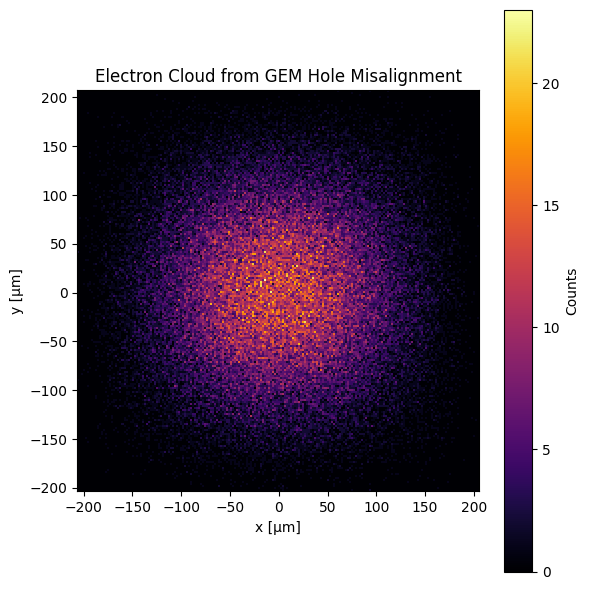

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_misalignment_spread(n_electrons=10000, n_layers=4, pitch=140):
    """
    Simulate geometrical misalignment broadening of an electron cloud
    through a multi-GEM structure.
    """
    n_jumps = n_layers - 1
    final_positions = []

    for _ in range(n_electrons):
        x, y = 0, 0
        for _ in range(n_jumps):
            # Random shift within a pitch-sized cell
            dx = np.random.uniform(-pitch/2, pitch/2)
            dy = np.random.uniform(-pitch/2, pitch/2)
            x += dx
            y += dy
        final_positions.append((x, y))

    x_vals, y_vals = zip(*final_positions)
    x_vals = np.array(x_vals)
    y_vals = np.array(y_vals)
    r_vals = np.sqrt(x_vals**2 + y_vals**2)

    return x_vals, y_vals, r_vals

# Run the simulation
x, y, r = simulate_misalignment_spread(n_electrons=100000)

# Calculate RMS radius
rms = np.std(r)
fwhm = 2.355 * rms
print(f"RMS radius from misalignment = {rms:.1f} µm")
print(f"FWHM = {fwhm:.1f} µm")

# Plot the result
plt.figure(figsize=(6,6))
plt.hist2d(x, y, bins=200, cmap='inferno')
plt.colorbar(label='Counts')
plt.gca().set_aspect('equal')
plt.xlabel('x [µm]')
plt.ylabel('y [µm]')
plt.title('Electron Cloud from GEM Hole Misalignment')
plt.tight_layout()
plt.show()


RMS radius from misalignment = 79.5 µm
FWHM = 187.2 µm


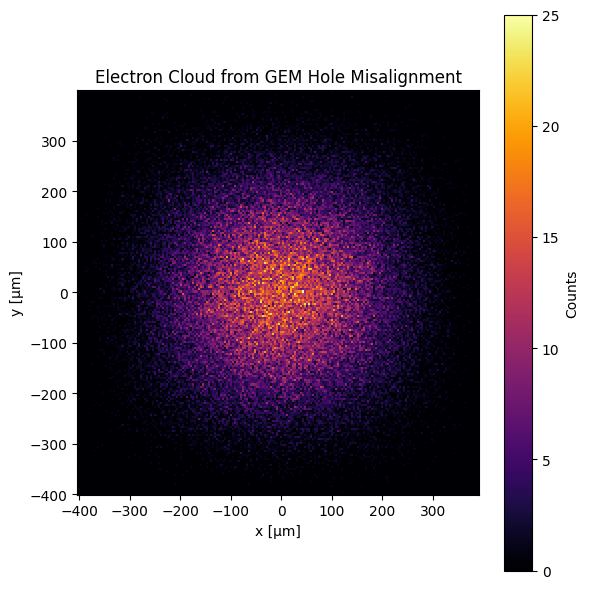

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_misalignment_spread(n_electrons=10000, pitches=[140, 280, 280,140]):

    final_positions = []

    for _ in range(n_electrons):
        x, y = 0, 0
        for pitch in pitches:
            dx = np.random.uniform(-pitch/2, pitch/2)
            dy = np.random.uniform(-pitch/2, pitch/2)
            x += dx
            y += dy
        final_positions.append((x, y))

    x_vals, y_vals = zip(*final_positions)
    x_vals = np.array(x_vals)
    y_vals = np.array(y_vals)
    r_vals = np.sqrt(x_vals**2 + y_vals**2)

    return x_vals, y_vals, r_vals

# Pitches between GEMs: layer 1: 140 μm, 2: 280 μm, 3: 280 μm, 4: 140 μm 
layer_pitches = [140, 280, 280, 140]
x, y, r = simulate_misalignment_spread(n_electrons=100000, pitches=layer_pitches)

# Calculate RMS radius and FWHM
rms = np.std(r)
fwhm = 2.355 * rms
print(f"RMS radius from misalignment = {rms:.1f} µm")
print(f"FWHM = {fwhm:.1f} µm")

# Plot the result
plt.figure(figsize=(6,6))
plt.hist2d(x, y, bins=200, cmap='inferno')
plt.colorbar(label='Counts')
plt.gca().set_aspect('equal')
plt.xlabel('x [µm]')
plt.ylabel('y [µm]')
plt.title('Electron Cloud from GEM Hole Misalignment')
plt.tight_layout()
plt.show()


RMS spread from hole misalignment = 36.7 µm
FWHM = 86.4 µm


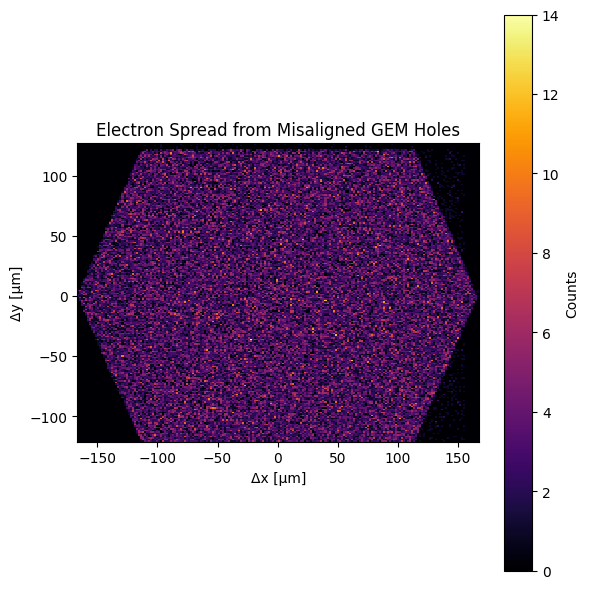

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_triangular_lattice(pitch, size=1000):
    """
    Generate a triangular lattice of hole centers covering a square of given size.
    Returns a list of (x, y) positions.
    """
    dx = pitch
    dy = pitch * np.sqrt(3)/2
    points = []
    for i in range(int(size/dx)+1):
        for j in range(int(size/dy)+1):
            x = i * dx
            y = j * dy
            if i % 2 == 1:
                y += dy / 2  # shift alternate rows
            points.append((x, y))
    return np.array(points)

def simulate_electron_spread(n_electrons=100000, pitch1=140, pitch2=280):
    """
    Simulate electron spread due to misaligned GEM holes with triangular grids.
    pitch1: hole pitch in first GEM layer (in microns)
    pitch2: hole pitch in second GEM layer (in microns)
    """
    # Generate hole centers for layer 2 (larger pitch, misaligned)
    layer2 = generate_triangular_lattice(pitch2, size=5000)

    # Random global misalignment of second layer
    misalign_dx = np.random.uniform(0, pitch2)
    misalign_dy = np.random.uniform(0, pitch2 * np.sqrt(3)/2)
    layer2[:, 0] += misalign_dx
    layer2[:, 1] += misalign_dy

    final_positions = []
    for _ in range(n_electrons):
        # Start at a random hole in layer 1
        x1 = np.random.uniform(0, pitch1)
        y1 = np.random.uniform(0, pitch1 * np.sqrt(3)/2)

        # Global coordinates
        x1 += np.random.randint(0, 30) * pitch1
        y1 += np.random.randint(0, 30) * pitch1 * np.sqrt(3)/2

        # Find nearest hole in layer 2
        dists = np.sum((layer2 - np.array([x1, y1]))**2, axis=1)
        nearest_idx = np.argmin(dists)
        x2, y2 = layer2[nearest_idx]

        dx = x2 - x1
        dy = y2 - y1
        final_positions.append((dx, dy))

    x_vals, y_vals = zip(*final_positions)
    x_vals = np.array(x_vals)
    y_vals = np.array(y_vals)
    r_vals = np.sqrt(x_vals**2 + y_vals**2)

    return x_vals, y_vals, r_vals

# Run the simulation
x, y, r = simulate_electron_spread()

# Analyze the result
rms = np.std(r)
fwhm = 2.355 * rms
print(f"RMS spread from hole misalignment = {rms:.1f} µm")
print(f"FWHM = {fwhm:.1f} µm")

# Plot
plt.figure(figsize=(6,6))
plt.hist2d(x, y, bins=200, cmap='inferno')
plt.colorbar(label='Counts')
plt.gca().set_aspect('equal')
plt.xlabel('Δx [µm]')
plt.ylabel('Δy [µm]')
plt.title('Electron Spread from Misaligned GEM Holes')
plt.tight_layout()
plt.show()



RMS spread from 4-layer misalignment = 49.9 µm
FWHM = 117.5 µm


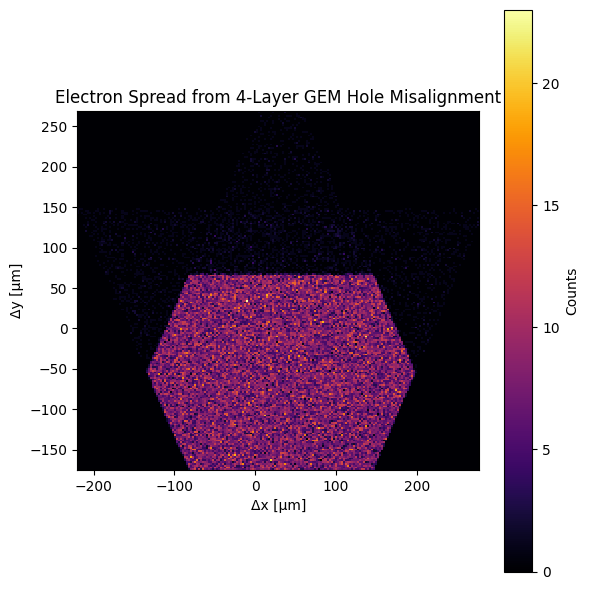

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_triangular_lattice(pitch, size=5000):
    dx = pitch
    dy = pitch * np.sqrt(3) / 2
    points = []
    for i in range(int(size / dx)):
        for j in range(int(size / dy)):
            x = i * dx
            y = j * dy
            if i % 2 == 1:
                y += dy / 2
            points.append((x, y))
    return np.array(points)

def apply_random_shift(lattice, pitch):
    dx = np.random.uniform(0, pitch)
    dy = np.random.uniform(0, pitch * np.sqrt(3)/2)
    return lattice + np.array([dx, dy])

def simulate_4layer_misalignment(n_electrons=100000, pitches=[140, 280, 280, 140]):
    # Generate hole patterns for each layer
    layers = []
    for pitch in pitches:
        lattice = generate_triangular_lattice(pitch)
        layers.append(apply_random_shift(lattice, pitch))

    # Start from layer 1, track shift through each layer
    final_positions = []
    pitch1 = pitches[0]
    dy1 = pitch1 * np.sqrt(3)/2

    for _ in range(n_electrons):
        # Pick random hole in layer 1
        x = np.random.uniform(0, pitch1)
        y = np.random.uniform(0, dy1)
        x += np.random.randint(0, 30) * pitch1
        y += np.random.randint(0, 30) * dy1
        pos = np.array([x, y])

        # Walk through each subsequent layer, snapping to nearest hole
        for layer in layers[1:]:
            dists = np.sum((layer - pos)**2, axis=1)
            nearest = layer[np.argmin(dists)]
            pos = nearest  # update position to snapped hole

        dx_total = pos[0] - x
        dy_total = pos[1] - y
        final_positions.append((dx_total, dy_total))

    x_vals, y_vals = zip(*final_positions)
    x_vals = np.array(x_vals)
    y_vals = np.array(y_vals)
    r_vals = np.sqrt(x_vals**2 + y_vals**2)

    return x_vals, y_vals, r_vals

# Run the simulation
pitches = [140, 280, 280, 140]
x, y, r = simulate_4layer_misalignment(n_electrons=100000, pitches=pitches)

# Analyze result
rms = np.std(r)
fwhm = 2.355 * rms
print(f"RMS spread from 4-layer misalignment = {rms:.1f} µm")
print(f"FWHM = {fwhm:.1f} µm")

# Plot
plt.figure(figsize=(6,6))
plt.hist2d(x, y, bins=200, cmap='inferno')
plt.colorbar(label='Counts')
plt.gca().set_aspect('equal')
plt.xlabel('Δx [µm]')
plt.ylabel('Δy [µm]')
plt.title('Electron Spread from 4-Layer GEM Hole Misalignment')
plt.tight_layout()
plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def generate_triangular_lattice(pitch, size=5000):
    dx = pitch
    dy = pitch * np.sqrt(3) / 2
    points = []
    for i in range(int(size / dx)):
        for j in range(int(size / dy)):
            x = i * dx
            y = j * dy
            if i % 2 == 1:
                y += dy / 2
            points.append((x, y))
    return np.array(points)

def shift_lattice(lattice, dx, dy):
    return lattice + np.array([dx, dy])

def simulate_with_manual_misalignment(n_electrons=100000,
                                      pitches=[140, 280, 280, 140],
                                      misalignments=[(0,0), (0,0), (0,0), (0,0)]):
    layers = []
    for pitch, (dx, dy) in zip(pitches, misalignments):
        lattice = generate_triangular_lattice(pitch)
        shifted = shift_lattice(lattice, dx, dy)
        layers.append(shifted)

    final_positions = []
    pitch1 = pitches[0]
    dy1 = pitch1 * np.sqrt(3)/2

    for _ in range(n_electrons):
        # Random start in layer 1
        x = np.random.uniform(0, pitch1)
        y = np.random.uniform(0, dy1)
        x += np.random.randint(0, 30) * pitch1
        y += np.random.randint(0, 30) * dy1
        pos = np.array([x, y])

        for layer in layers[1:]:
            dists = np.sum((layer - pos)**2, axis=1)
            nearest = layer[np.argmin(dists)]
            pos = nearest  # move to nearest hole

        dx_total = pos[0] - x
        dy_total = pos[1] - y
        final_positions.append((dx_total, dy_total))

    x_vals, y_vals = zip(*final_positions)
    x_vals = np.array(x_vals)
    y_vals = np.array(y_vals)
    r_vals = np.sqrt(x_vals**2 + y_vals**2)

    return x_vals, y_vals, r_vals, layers

# === Define pitches and misalignments ===
pitches = [140, 280, 280, 140]  # µm
misalignments = [               # (dx, dy) per layer in µm
    (0, 0),     # Layer 1: reference
    (0, 0),   # Layer 2
    (0, 0),  # Layer 3
    (0, 0)   # Layer 4
]

# === Run simulation ===
x, y, r, layer_holes = simulate_with_manual_misalignment(
    n_electrons=100000,
    pitches=pitches,
    misalignments=misalignments
)

# === Print RMS and FWHM ===
rms = np.std(r)
fwhm = 2.355 * rms
print(f"RMS spread = {rms:.1f} µm")
print(f"FWHM = {fwhm:.1f} µm")

# === Plot hole positions (misalignment visualizer) ===
plt.figure(figsize=(8, 8))
colors = ['black', 'red', 'blue', 'green']
for i, (holes, pitch) in enumerate(zip(layer_holes, pitches)):
    mask = (holes[:, 0] < 2000) & (holes[:, 1] < 2000)  # crop for clarity
    plt.plot(holes[mask, 0], holes[mask, 1], '.', markersize=2, label=f'Layer {i+1}, {pitch} µm', color=colors[i])

plt.gca().set_aspect('equal')
plt.title("GEM Hole Centers with Manual Misalignment")
plt.xlabel("x [µm]")
plt.ylabel("y [µm]")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# === Plot final electron spread ===
plt.figure(figsize=(6, 6))
plt.hist2d(x, y, bins=200, cmap='inferno')
plt.colorbar(label='Counts')
plt.gca().set_aspect('equal')
plt.xlabel('Δx [µm]')
plt.ylabel('Δy [µm]')
plt.title('Electron Spread from GEM Misalignment')
plt.tight_layout()
plt.show()


ZeroDivisionError: division by zero

RMS spread = 69.6 µm
FWHM = 163.9 µm


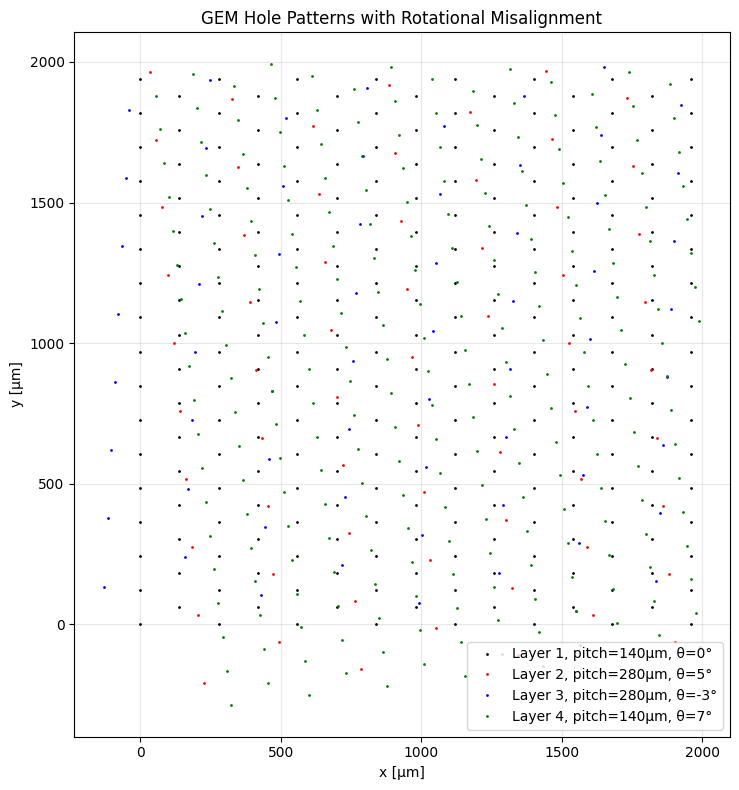

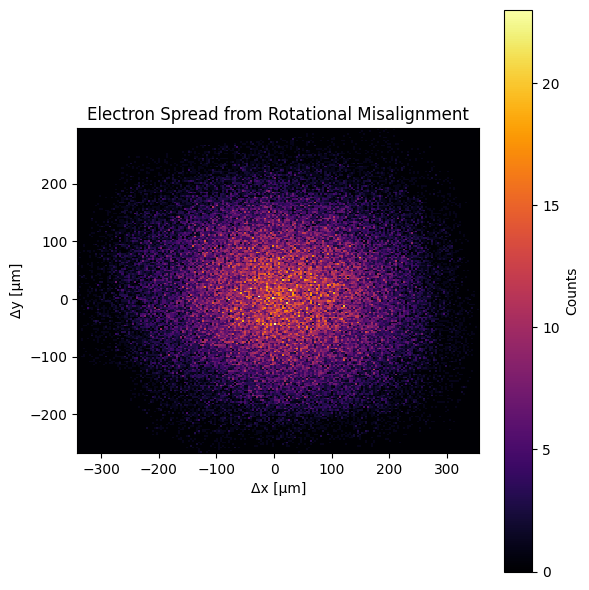

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def generate_triangular_lattice(pitch, size=5000):
    dx = pitch
    dy = pitch * np.sqrt(3) / 2
    points = []
    for i in range(int(size / dx)):
        for j in range(int(size / dy)):
            x = i * dx
            y = j * dy
            if i % 2 == 1:
                y += dy / 2
            points.append((x, y))
    return np.array(points)

def rotate_lattice(lattice, angle_deg, center=(2500, 2500)):
    """Rotate lattice by angle_deg around the center."""
    theta = np.radians(angle_deg)
    rot_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                           [np.sin(theta),  np.cos(theta)]])
    shifted = lattice - center
    rotated = shifted @ rot_matrix.T
    return rotated + center

def simulate_with_rotational_misalignment(n_electrons=100000,
                                          pitches=[140, 280, 280, 140],
                                          angles_deg=[0, 5, -3, 7]):
    # Generate and rotate lattices for each layer
    layers = []
    for pitch, angle in zip(pitches, angles_deg):
        lattice = generate_triangular_lattice(pitch)
        rotated = rotate_lattice(lattice, angle)
        layers.append(rotated)

    final_positions = []
    pitch1 = pitches[0]
    dy1 = pitch1 * np.sqrt(3)/2

    for _ in range(n_electrons):
        # Start at a random hole in layer 1
        x = np.random.uniform(0, pitch1)
        y = np.random.uniform(0, dy1)
        x += np.random.randint(0, 30) * pitch1
        y += np.random.randint(0, 30) * dy1
        pos = np.array([x, y])

        for layer in layers[1:]:
            dists = np.sum((layer - pos)**2, axis=1)
            nearest = layer[np.argmin(dists)]
            pos = nearest

        dx_total = pos[0] - x
        dy_total = pos[1] - y
        final_positions.append((dx_total, dy_total))

    x_vals, y_vals = zip(*final_positions)
    x_vals = np.array(x_vals)
    y_vals = np.array(y_vals)
    r_vals = np.sqrt(x_vals**2 + y_vals**2)

    return x_vals, y_vals, r_vals, layers

# === Define misalignment angles in degrees ===
angles_deg = [0, 5, -3, 7]  # rotation per layer
pitches = [140, 280, 280, 140]

# Run simulation
x, y, r, layer_holes = simulate_with_rotational_misalignment(
    n_electrons=100000,
    pitches=pitches,
    angles_deg=angles_deg
)

# RMS and FWHM
rms = np.std(r)
fwhm = 2.355 * rms
print(f"RMS spread = {rms:.1f} µm")
print(f"FWHM = {fwhm:.1f} µm")

# Plot GEM holes
plt.figure(figsize=(8, 8))
colors = ['black', 'red', 'blue', 'green']
for i, (holes, pitch) in zip(range(4), zip(layer_holes, pitches)):
    mask = (holes[:, 0] < 2000) & (holes[:, 1] < 2000)
    plt.plot(holes[mask, 0], holes[mask, 1], '.', markersize=2,
             label=f'Layer {i+1}, pitch={pitch}µm, θ={angles_deg[i]}°', color=colors[i])

plt.gca().set_aspect('equal')
plt.title("GEM Hole Patterns with Rotational Misalignment")
plt.xlabel("x [µm]")
plt.ylabel("y [µm]")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot spread
plt.figure(figsize=(6, 6))
plt.hist2d(x, y, bins=200, cmap='inferno')
plt.colorbar(label='Counts')
plt.gca().set_aspect('equal')
plt.xlabel('Δx [µm]')
plt.ylabel('Δy [µm]')
plt.title('Electron Spread from Rotational Misalignment')
plt.tight_layout()
plt.show()


# GEOMETRY

<img src="/Users/mitrankova/Jupyter/e_cloud.png" alt="Drift diagram" width="500"/>

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import binned_statistic
from scipy.optimize import curve_fit
from sklearn.neighbors import KNeighborsRegressor

In [3]:
def gaussian(r, A, sigma):
    return A * np.exp(-0.5 * (r / sigma)**2)

def estimate_rms_from_image( colorbar_x_range=(780, 790), crop_margin=100, fit_range=(0, 0.1)):

    image_path = "/Users/mitrankova/Jupyter/e_cloud.png" 
    image_path_cropped = "/Users/mitrankova/Jupyter/e_cloud_cropped.png"    
    # Load image
    img_rgb = Image.open(image_path).convert("RGB")
    img_array = np.array(img_rgb)

    img_rgb_crop = Image.open(image_path_cropped).convert("RGB")
    img_array_crop = np.array(img_rgb_crop)

    #  Extract colorbar region (right side)
    cb_x_start, cb_x_end = colorbar_x_range
    cb_region = img_array[:, cb_x_start:cb_x_end, :]
    avg_colorbar = cb_region.mean(axis=1)  # (height, 3)

    # Create reference colormap (JET assumed here)
    cmap = plt.get_cmap('jet', 256)
    cmap_colors = (cmap(np.linspace(0, 1, 256))[:, :3] * 255).astype(np.uint8)
    log_vals = np.linspace(np.log10(1), np.log10(1e4), 256)

    #  Train RGB - log(intensity) converter
    regressor = KNeighborsRegressor(n_neighbors=3)
    regressor.fit(cmap_colors, log_vals)

    # Decode full image
    flat_rgb = img_array_crop.reshape(-1, 3)
    log_pred = regressor.predict(flat_rgb)
    #log_img = log_pred.reshape(img_array_crop.shape[0], img_array_crop.shape[1])
    log_img_cropped = log_pred.reshape(img_array_crop.shape[0], img_array_crop.shape[1])

    


    #Compute radial distances from center
    height, width  = log_img_cropped.shape
    print(width, height)
    x_center, y_center = width // 2, height // 2
    print( x_center, y_center )
    Y, X = np.indices((height, width))
    #print(X,Y)
    #print(X- x_center,Y- y_center)
    R = np.sqrt((X - x_center)**2 + (Y - y_center)**2)

    #print(R)

    print("Last R ", R[-1])
    R_mask = R <width/2
    R = R[R_mask] * (0.300 / width)  # convert to cm ( full width = 0.3 cm)
    #print(R)

    print("Last R ", R[-1])

    plt.figure(figsize=(6, 6))
    plt.imshow(log_img_cropped,  origin='lower', extent=[-0.15, 0.15, -0.15, 0.15])
    plt.plot(R, R*0, '.', markersize=2)
    #plt.colorbar(label='Log(Intensity)')
    #plt.title('Cropped Electron Cloud Image')
    #plt.xlabel('x [cm]')
    #plt.ylabel('y [cm]')
    #plt.grid(False)
    plt.tight_layout()
    plt.show()

    # Step 8: Bin radial profile
    r_bins = np.linspace(0, np.max(R), 100)
    bin_centers = 0.5 * (r_bins[:-1] + r_bins[1:])
    profile, _, _ = binned_statistic(R.ravel(), log_img_cropped.ravel(), statistic='mean', bins=r_bins)

    #  Fit Gaussian to inner region 
    r_min, r_max = fit_range
    fit_mask = (bin_centers >= r_min) & (bin_centers <= r_max)
    popt, _ = curve_fit(gaussian, bin_centers[fit_mask], profile[fit_mask], p0=[np.max(profile), 0.04])

    A_fit, sigma_fit = popt
    fwhm_fit = 2.355 * sigma_fit

    # Plot
    plt.figure(figsize=(6, 4))
    plt.plot(bin_centers, profile, 'o', label='Radial log-intensity')
    plt.plot(bin_centers, gaussian(bin_centers, *popt), 'r-', label=f'Gaussian fit\nsigma = {sigma_fit:.3f} cm, FWHM={fwhm_fit:.3f} cm')
    plt.xlabel('Radius [cm]')
    plt.ylabel('Log_{10}(Intensity)')
    plt.title('Radial Profile from Colorbar-Decoded Image')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return sigma_fit, fwhm_fit

#==========RUN================
image_path = "/Users/mitrankova/Jupyter/e_cloud.png"  
sigma, fwhm = estimate_rms_from_image(fit_range=(0.01, 0.08))

print(f"Estimated sigma = {sigma*1e4:.0f} micron")
print(f"Estimated FWHM = {fwhm*1e4:.0f} micron")


NameError: name 'Image' is not defined

RMS spread = 35.6 µm
FWHM = 83.8 µm


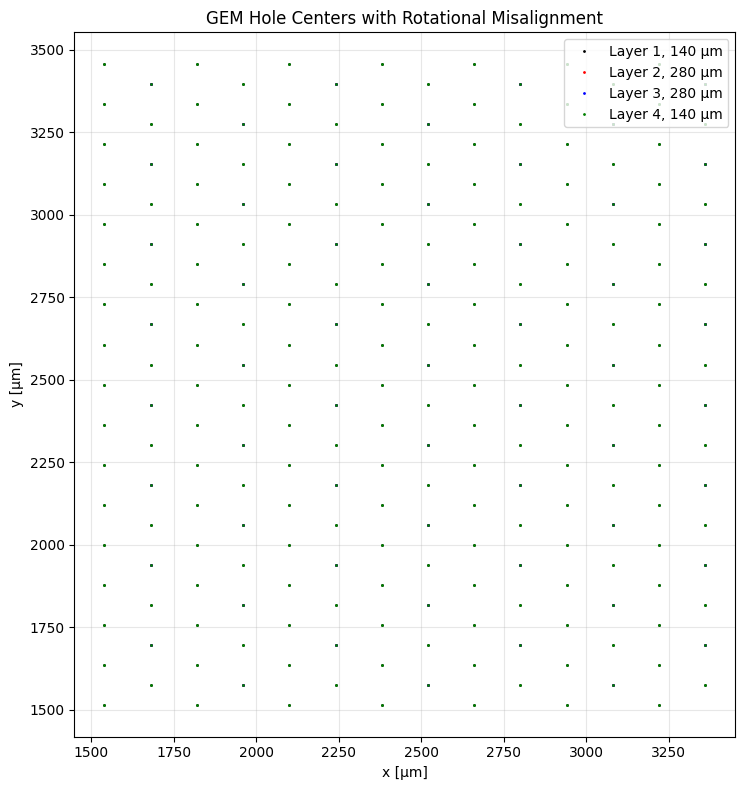

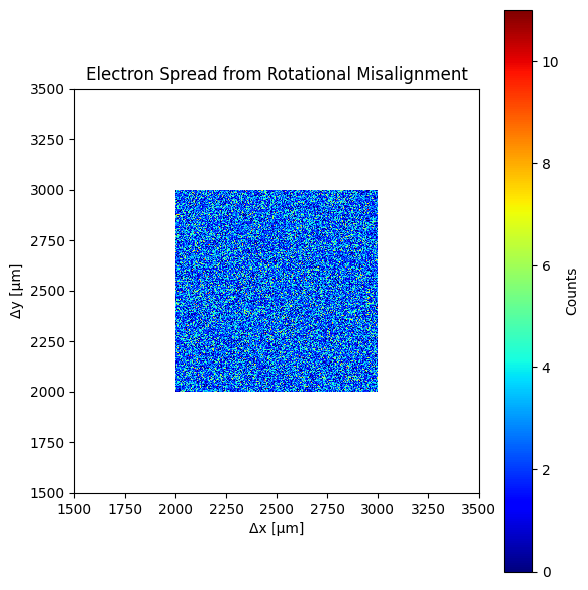

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def generate_triangular_lattice(pitch, transl, size=5000):
    dx = pitch + transl[0]
    dy = pitch * np.sqrt(3) / 2 + transl[1]
    points = []
    for i in range(int(size / dx)):
        for j in range(int(size / dy)):
            x = i * dx
            y = j * dy
            if i % 2 == 1:
                y += dy / 2
            points.append((x, y))
    return np.array(points)

def rotate_lattice(lattice, angle_deg, center):
    """
    Rotate lattice around a given center by angle in degrees.
    """
    angle_rad = np.deg2rad(angle_deg)
    translated = lattice - center
    rot_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad)],
        [np.sin(angle_rad),  np.cos(angle_rad)]
    ])
    rotated = translated @ rot_matrix.T
    return rotated + center

def simulate_rotational_misalignment(n_electrons=100000,
                                     pitches=[140, 280, 280, 140],
                                     angles_deg=[0,0,0, 0],
                                     ):
    """
    angles_deg: rotation of each layer (in degrees) around lattice center.
    """
    size = 5000
    center = np.array([size/2, size/2])
    layers = []

    transl_misalignment = [               # (dx, dy) per layer in microns
        (0, 0),     
        (0, 0),     
        (0, 0),     
        (0, 0)     
    ]
    for pitch, angle, transl in zip(pitches, angles_deg, transl_misalignment):
        lattice = generate_triangular_lattice(pitch, transl, size=size)
        rotated = rotate_lattice(lattice, angle, center)
        layers.append(rotated)

    final_positions = []
    before_positions = []
    after_positions = []
    pitch1 = pitches[0]
    dy1 = pitch1 * np.sqrt(3)/2

    for _ in range(n_electrons):
        # Random starting point befofre layer 1 (near center)
        x = np.random.uniform(center[0] - 500, center[0] + 500)
        y = np.random.uniform(center[1] - 500, center[1] + 500)
        #x = (center[0] - 500)
        #y =(center[1] - 500)
        pos = np.array([x, y])
        before_positions.append((x, y))
        
        for layer in layers[1:]:
            dists = np.sum((layer - pos)**2, axis=1)
            nearest = layer[np.argmin(dists)]
            pos = nearest  # update to new snapped position
        
        dx_total = pos[0] - x
        dy_total = pos[1] - y
        after_positions.append((pos[0], pos[1]))
        final_positions.append((dx_total, dy_total))

    x_vals, y_vals = zip(*final_positions)
    x_vals = np.array(x_vals)
    y_vals = np.array(y_vals)

    x_i, y_i = zip(*before_positions)
    x_i = np.array(x_i)
    y_i = np.array(y_i)

    x_f, y_f = zip(*after_positions)
    x_f = np.array(x_f)
    y_f = np.array(y_f)

    r_vals = np.sqrt(x_vals**2 + y_vals**2)

    return x_vals, y_vals, r_vals, layers, center, x_i, y_i, x_f, y_f

# === Configuration ===
pitches = [140, 280, 280, 140]
#pitches = [140]
angles_deg = [0, 0, 0, 0]  # degrees of rotation per layer

# === Run simulation ===
x, y, r, layer_holes, center, x_i, y_i, x_f, y_f  = simulate_rotational_misalignment(
    n_electrons=100000,
    pitches=pitches,
    angles_deg=angles_deg
)

# === Print metrics ===
rms = np.std(r)
fwhm = 2.355 * rms
print(f"RMS spread = {rms:.1f} µm")
print(f"FWHM = {fwhm:.1f} µm")

# === Plot: Hole positions for each layer ===
plt.figure(figsize=(8, 8))
colors = ['black', 'red', 'blue', 'green']
for i, (holes, pitch) in enumerate(zip(layer_holes, pitches)):
    mask = (np.abs(holes[:,0] - center[0]) < 1000) & (np.abs(holes[:,1] - center[1]) < 1000)
    plt.plot(holes[mask, 0], holes[mask, 1], '.', markersize=2, color=colors[i], label=f'Layer {i+1}, {pitch} µm')

plt.gca().set_aspect('equal')
plt.title("GEM Hole Centers with Rotational Misalignment")
plt.xlabel("x [µm]")
plt.ylabel("y [µm]")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# === Plot: Electron spread ===
plt.figure(figsize=(6, 6))
#plt.hist2d(x, y, bins=200, cmap='inferno')
plt.hist2d(x_i, y_i, bins=200, cmap='jet')
#plt.hist2d(x_f, y_f, bins=200, cmap='inferno')
plt.colorbar(label='Counts')
plt.xlim(1500, 3500)
plt.ylim(1500, 3500)
plt.gca().set_aspect('equal')
plt.xlabel('Δx [µm]')
plt.ylabel('Δy [µm]')
plt.title('Electron Spread from Rotational Misalignment')
plt.tight_layout()
plt.show()
